In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import sys
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
np.set_printoptions(linewidth=100, suppress=True)

# (b) Exploring the data:

# i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [56]:
#loading data
filename1 = "Folds5x2_pp/Sheet1-Table 1.csv"
'''
filename2 = "Folds5x2_pp/Sheet2-Table 1.csv"
filename3 = "Folds5x2_pp/Sheet3-Table 1.csv"
filename4 = "Folds5x2_pp/Sheet4-Table 1.csv"
filename5 = "Folds5x2_pp/Sheet5-Table 1.csv"
'''
data1 = pd.read_csv(filename1, header=0)
data1 = np.array(data1.values, dtype=float)
'''
data2 = pd.read_csv(filename2, header=0)
data2 = np.array(data2.values, dtype=float)
data3 = pd.read_csv(filename3, header=0)
data3 = np.array(data3.values, dtype=float)
data4 = pd.read_csv(filename4, header=0)
data4 = np.array(data4.values, dtype=float)
data5 = pd.read_csv(filename5, header=0)
data5 = np.array(data5.values, dtype=float)
'''

'\ndata2 = pd.read_csv(filename2, header=0)\ndata2 = np.array(data2.values, dtype=float)\ndata3 = pd.read_csv(filename3, header=0)\ndata3 = np.array(data3.values, dtype=float)\ndata4 = pd.read_csv(filename4, header=0)\ndata4 = np.array(data4.values, dtype=float)\ndata5 = pd.read_csv(filename5, header=0)\ndata5 = np.array(data5.values, dtype=float)\n'

In [57]:
'''
data=np.append(data1,data2,axis = 0)
data=np.append(data,data3,axis = 0)
data=np.append(data,data4,axis = 0)
data=np.append(data,data5,axis = 0)
data.shape
'''

'\ndata=np.append(data1,data2,axis = 0)\ndata=np.append(data,data3,axis = 0)\ndata=np.append(data,data4,axis = 0)\ndata=np.append(data,data5,axis = 0)\ndata.shape\n'

In [58]:
'''
Columns:Features consist of 
hourly average ambient variables Temperature (T), 
Ambient Pressure (AP), 
Relative Humidity (RH),
Exhaust Vacuum (V), 
to predict the net hourly electrical energy output (EP) of the plant
'''
data_df1 = pd.DataFrame(data1,columns=['T','V','AP','RH','EP'])
print(data_df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
T     9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
EP    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB
None


Answer: In this dataset, every sheet has 9568 rows and 5 columns. Rows represeant, from 2006 to 2011, when the power plant was set to work with full load, data points.
Columns(4 features & 1 output) represeant: 
hourly average ambient variables Temperature (T), 
Ambient Pressure (AP), 
Relative Humidity (RH),
Exhaust Vacuum (V), 
net hourly electrical energy output (EP) of the plant.

## ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

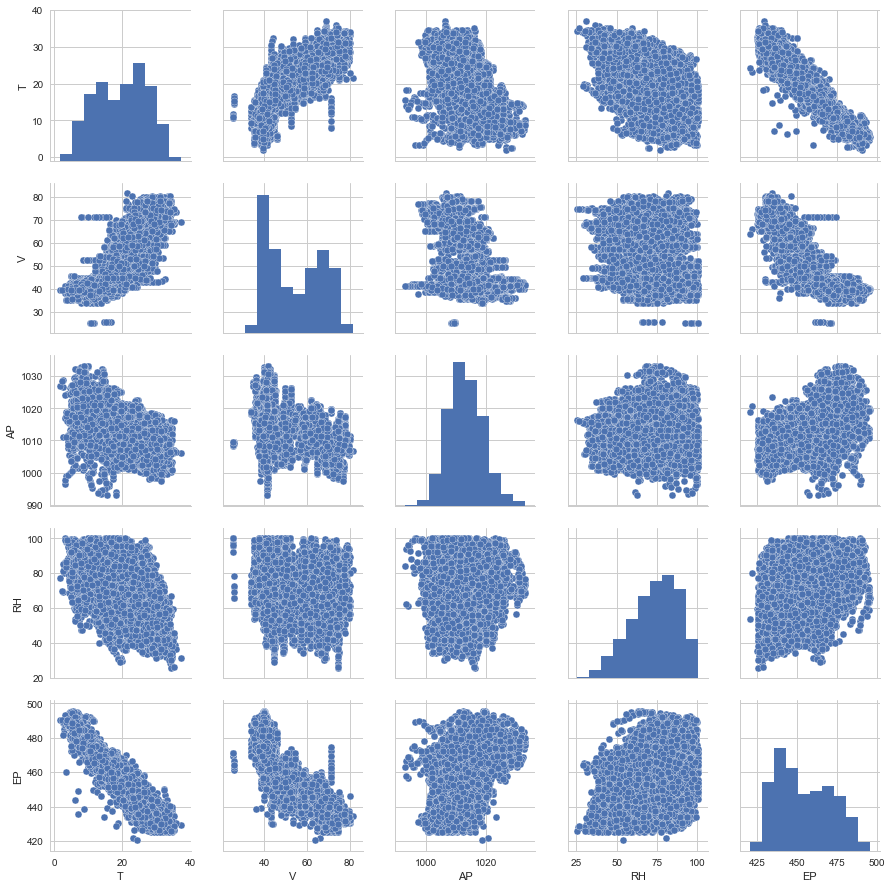

In [59]:
sns.pairplot(data_df1)

we can find that T & V positvie correlation; T & EP negative correlation; V & EP negative correlation;There is no obviours correlation among AP,RH,EP.

# iii. What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [60]:
df1_desc = data_df1.describe()
print(df1_desc)
print(df1_desc.shape)

                 T            V           AP           RH           EP
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000
(8, 5)


In [136]:
a=df1_desc.values.reshape(45,1)
a = df1_desc.unstack()
a


T   count            9568.000000
    mean               19.651231
    std                 7.452473
    min                 1.810000
    25%                13.510000
    50%                20.345000
    75%                25.720000
    max                37.110000
    interquartile      12.210000
V   count            9568.000000
    mean               54.305804
    std                12.707893
    min                25.360000
    25%                41.740000
    50%                52.080000
    75%                66.540000
    max                81.560000
    interquartile      24.800000
AP  count            9568.000000
    mean             1013.259078
    std                 5.938784
    min               992.890000
    25%              1009.100000
    50%              1012.940000
    75%              1017.260000
    max              1033.300000
    interquartile       8.160000
RH  count            9568.000000
    mean               73.308978
    std                14.600269
    min   

In [61]:
df1_desc.loc['interquartile']=[(df1_desc['T']['75%']-df1_desc['T']['25%']),
                           (df1_desc['V']['75%']-df1_desc['V']['25%']),
                           (df1_desc['AP']['75%']-df1_desc['AP']['25%']),
                           (df1_desc['RH']['75%']-df1_desc['RH']['25%']),
                           (df1_desc['EP']['75%']-df1_desc['EP']['25%'])]
df1_desc

,T,V,AP,RH,EP
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
interquartile,12.210000,24.800000,8.160000,21.502500,28.680000


# (c) For each predictor , fit a simple linear regression model to predict the response.Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
data_df1.head()

,T,V,AP,RH,EP
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [64]:
d_XT = data_df1['T']
d_XV = data_df1['V']
d_XAP = data_df1['AP']
d_XRH = data_df1['RH']
d_YEP = data_df1['EP']
d_XT = np.array(d_XT).reshape(-1,1)
d_XV = np.array(d_XV).reshape(-1,1)
d_XAP = np.array(d_XAP).reshape(-1,1)
d_XRH = np.array(d_XRH).reshape(-1,1)
d_YEP = np.array(d_YEP).reshape(-1,1)

In [65]:
d_x = data_df1.iloc[:,:-1]
d_y = data_df1.iloc[:,4]


In [66]:
regr_T = LinearRegression(fit_intercept=True,normalize=False).fit(d_XT,d_YEP)
regr_V = LinearRegression(fit_intercept=True,normalize=False).fit(d_XV,d_YEP)
regr_AP = LinearRegression(fit_intercept=True,normalize=False).fit(d_XAP,d_YEP)
regr_RH = LinearRegression(fit_intercept=True,normalize=False).fit(d_XRH,d_YEP)
print(regr_T.score(d_XT,d_YEP))
print(regr_V.score(d_XV,d_YEP))
print(regr_AP.score(d_XAP,d_YEP))
print(regr_RH.score(d_XRH,d_YEP))

0.8989475964148236
0.7565177870683979
0.2687686564110674
0.15193944023117567


[[-2.17131996]]


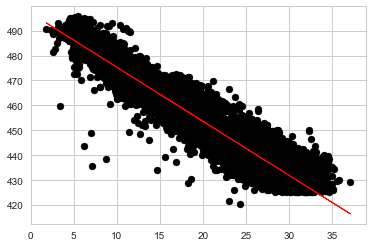

In [67]:
plt.scatter(d_XT, d_YEP,  color='black')
plt.plot(d_XT, regr_T.predict(d_XT), color='red', linewidth=1)
print(regr_T.coef_)

[[-1.16813513]]


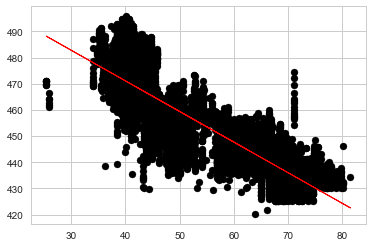

In [68]:
plt.scatter(d_XV, d_YEP,  color='black')
plt.plot(d_XV, regr_V.predict(d_XV), color='red', linewidth=1)
print(regr_V.coef_)

[[1.48987167]]


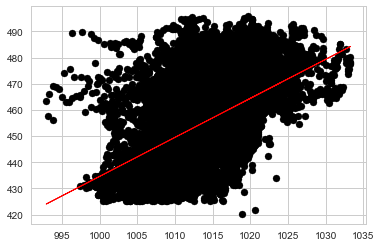

In [69]:
plt.scatter(d_XAP, d_YEP,  color='black')
plt.plot(d_XAP, regr_AP.predict(d_XAP), color='red', linewidth=1)
print(regr_AP.coef_)

[[0.4556501]]


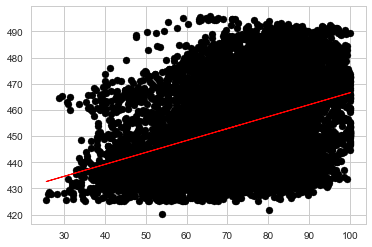

In [70]:
plt.scatter(d_XRH, d_YEP,  color='black')
plt.plot(d_XRH, regr_RH.predict(d_XRH), color='red', linewidth=1)
print(regr_RH.coef_)

In [20]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

fit_1 = sm.formula.ols('EP~T+V+AP+RH',data = data_df1).fit()
outliers = fit_1.get_influence()
leverage = outliers.hat_matrix_diag
print(fit_1.summary())
dffits = outliers.dffits[ 0]

resid_stu = outliers.resid_studentized_external

cook = outliers.cooks_distance[ 0]

covratio = outliers.cov_ratio

contat1 = pd.concat([pd.Series(leverage, name = 'leverage'),pd.Series(dffits, name = 'dffits'), 
                     pd.Series(resid_stu,name = 'resid_stu'),pd.Series(cook, name = 'cook'), 
                     pd.Series(covratio, name = 'covratio'),],axis = 1)
ccpp_outliers = pd.concat([data_df1,contat1], axis = 1)
print(ccpp_outliers.head())
outliers_ratio = sum(np.where((np.abs(ccpp_outliers.resid_stu)> 2), 1, 0))/ccpp_outliers.shape[ 0]
print(outliers_ratio)

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:17:17   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

In [98]:
ccpp_outliers = ccpp_outliers.loc[np.abs(ccpp_outliers.resid_stu)<= 2,]
fit_2 = sm.formula.ols( 'EP~T+V+AP+RH',data = ccpp_outliers).fit()
pred2 = fit_2.predict()
mse_2 = (mean_squared_error(ccpp_outliers['EP'], pred2))
mse_2


16.015623840288203

Answer: Based on scores(R^2) and the plots, we can find that the EP can be explained by T or V individualy, but may not be explained by AP or RH individualy. We also can find from plots that there are some outliers that we need to remove.

# (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?

In [19]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
fit = sm.formula.ols('EP~T+V+AP+RH',data = data_df1).fit().summary()
print(fit)
regr= LinearRegression(fit_intercept=True,normalize=False).fit(d_x,d_y)
print(regr.coef_)

                            OLS Regression Results                            
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:17:17   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

Answer: From the summary above, we can find that every predictors' p-value are zero, which means that we can reject all the null hypothesis

# (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

[array([-2.17131996]), array([-1.16813513]), array([1.48987167]), array([0.4556501])]
[-1.97751311 -0.23391642  0.06208294 -0.1580541 ]


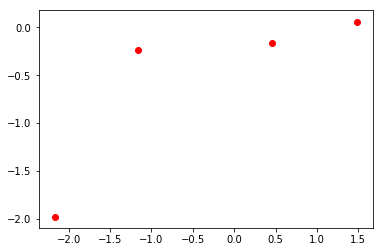

In [22]:
regr_coef = [regr_T.coef_[0],regr_V.coef_[0],regr_AP.coef_[0],regr_RH.coef_[0]]
print(regr_coef)
print(regr.coef_)
plt.scatter(regr_coef, regr.coef_, color='red', linewidth=1)

# Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form
Y =β0 +β1X+β2X2 +β3X3 +ε

In [23]:
from sklearn import preprocessing
a=data_df1.loc[:,['T','EP']]
a = preprocessing.scale(d_XT)
b = preprocessing.scale(d_YEP)

In [24]:
t = data_df1.loc[:,'T']
ep = data_df1.loc[:,'EP']
v = data_df1.loc[:,'V']
ap = data_df1.loc[:,'AP']
rh = data_df1.loc[:,'RH']
a = regr_T.predict(d_XT)
a = a.reshape(-1)


In [25]:
reg2 = sm.formula.ols('EP~T+I(T**2)+I(T**3)',data = data_df1).fit().summary()
reg2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:17:51   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.000     491.409     494.047
T             -0.6103      0.124     -4.941      0.000      -0.852      -0.368
I(T ** 2)     -0.1251      0.007    -18.199      0.000      -0.139      -0.112
I(T ** 3)      0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

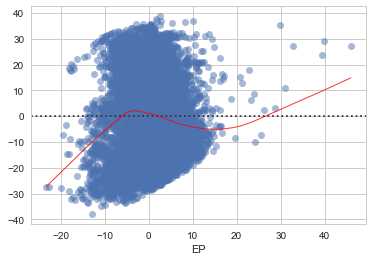

In [26]:
sns.set(style="whitegrid")
sns.residplot((regr_T.predict(d_XT).reshape(-1)-ep),regr_T.predict(d_XT).reshape(-1),
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

In [27]:
reg2 = sm.formula.ols('EP~V+I(v**2)+I(V**3)',data = data_df1).fit().summary()
reg2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:17:56   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.000     536.209     572.084
V             -2.1444      0.509     -4.214      0.000      -3.142      -1.147
I(v ** 2)     -0.0027      0.009     -0.294      0.768      -0.021       0.015
I(V ** 3)      0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

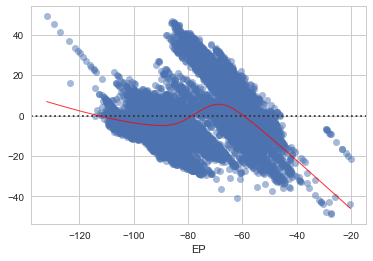

In [28]:
sns.set(style="whitegrid")
sns.residplot((regr_T.predict(d_XV).reshape(-1)-ep),regr_T.predict(d_XV).reshape(-1),
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

In [29]:
reg3 = sm.formula.ols('EP~AP+I(AP**2)+I(AP**3)',data = data_df1).fit().summary()
reg3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:18:00   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.000       0.057       0.092
AP            25.2556      3.001      8.415      0.000      19.372      31.139
I(AP ** 2)    -0.0500      0.006     -8.439      0.000      -0.062      -0.038
I(AP ** 3)  2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

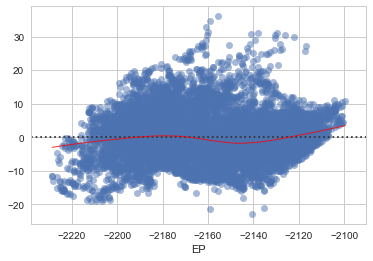

In [30]:
sns.set(style="whitegrid")
sns.residplot((regr_T.predict(d_XAP).reshape(-1)-ep),regr_T.predict(d_XAP).reshape(-1),
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

In [31]:
reg4 = sm.formula.ols('EP~RH+I(RH**2)+I(RH**3)',data = data_df1).fit().summary()
reg4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:18:06   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.000     447.744     489.083
RH            -1.7292      0.486     -3.557      0.000      -2.682      -0.776
I(RH ** 2)     0.0321      0.007      4.433      0.000       0.018       0.046
I(RH ** 3)    -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

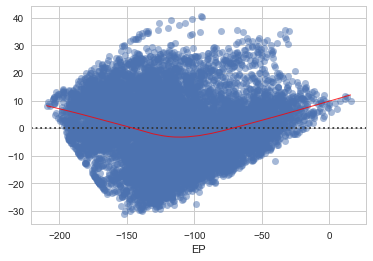

In [32]:
sns.set(style="whitegrid")
sns.residplot((regr_T.predict(d_XRH).reshape(-1)-ep),regr_T.predict(d_XRH).reshape(-1),
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [33]:
reg5 = sm.formula.ols('EP~T+V+AP+RH+I(T*V)+I(T*AP)+I(T*RH)+I(V*AP)+I(V*RH)+I(AP*RH)',data = data_df1).fit().summary()
reg5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:18:11   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
T             -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
I(T * V)       0.0210      0.001     23.338      0.000       0.019       0.023
I(T * AP)      0.0018      0.002      0.752      0.452      -0.003       0.006
I(T * RH)     -0.0052      0.001     -6.444      0.000      -0.007      -0.004
I(V * AP)      0.0068      0.001      5.135      0.000       0.004       0.009
I(V * RH)      0.0008      0.000      1.716      0.086      -0.000       0.002
I(AP * RH)    -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
reg_g1 = sm.formula.ols('EP~T+V+AP+RH+I(T*V)',data = data_df1).fit().summary()
reg_g1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.741e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:18:11   Log-Likelihood:                -27662.
No. Observations:                9568   AIC:                         5.534e+04
Df Residuals:                    9562   BIC:                         5.538e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    444.1431      9.331     47.598      0.000     425.852     462.434
T             -2.8764      0.033    -85.901      0.000      -2.942      -2.811
V             -0.6936      0.017    -41.027      0.000      -0.727      -0.660
AP             0.0903      0.009      9.932      0.000       0.073       0.108
RH            -0.1300      0.004    -31.746      0.000      -0.138      -0.122
I(T * V)       0.0195      0.001     29.841      0.000       0.018       0.021
==============================================================================
Omnibus:                     1332.362   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7539.890
Skew:                          -0.542   Prob(JB):                         0.00
Kurtosis:                       7.212   Cond. No.                     3.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
reg_g2 = sm.formula.ols('EP~T+V+AP+RH+I(T*AP)',data = data_df1).fit().summary()
reg_g2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.493e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:18:11   Log-Likelihood:                -28084.
No. Observations:                9568   AIC:                         5.618e+04
Df Residuals:                    9562   BIC:                         5.622e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    400.2946     21.592     18.539      0.000     357.970     442.619
T              1.2033      1.128      1.066      0.286      -1.009       3.415
V             -0.2350      0.007    -32.240      0.000      -0.249      -0.221
AP             0.1157      0.021      5.448      0.000       0.074       0.157
RH            -0.1579      0.004    -37.891      0.000      -0.166      -0.150
I(T * AP)     -0.0031      0.001     -2.819      0.005      -0.005      -0.001
==============================================================================
Omnibus:                      898.231   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4070.418
Skew:                          -0.361   Prob(JB):                         0.00
Kurtosis:                       6.113   Cond. No.                     9.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
reg_g3 = sm.formula.ols('EP~T+V+AP+RH+I(T*RH)',data = data_df1).fit().summary()
reg_g3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.627e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:18:11   Log-Likelihood:                -27851.
No. Observations:                9568   AIC:                         5.571e+04
Df Residuals:                    9562   BIC:                         5.576e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    432.6321      9.563     45.241      0.000     413.887     451.377
T             -1.2744      0.035    -36.174      0.000      -1.343      -1.205
V             -0.2306      0.007    -32.455      0.000      -0.245      -0.217
AP             0.0681      0.009      7.379      0.000       0.050       0.086
RH             0.0477      0.010      4.681      0.000       0.028       0.068
I(T * RH)     -0.0096      0.000    -22.030      0.000      -0.010      -0.009
==============================================================================
Omnibus:                     1148.268   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5800.230
Skew:                          -0.476   Prob(JB):                         0.00
Kurtosis:                       6.694   Cond. No.                     3.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
reg_g4 = sm.formula.ols('EP~T+V+AP+RH+I(V*AP)',data = data_df1).fit().summary()
reg_g4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.492e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:18:11   Log-Likelihood:                -28086.
No. Observations:                9568   AIC:                         5.618e+04
Df Residuals:                    9562   BIC:                         5.623e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    377.0214     36.334     10.377      0.000     305.799     448.244
T             -1.9751      0.015   -128.885      0.000      -2.005      -1.945
V              1.3120      0.697      1.881      0.060      -0.055       2.679
AP             0.1388      0.036      3.869      0.000       0.068       0.209
RH            -0.1582      0.004    -37.961      0.000      -0.166      -0.150
I(V * AP)     -0.0015      0.001     -2.217      0.027      -0.003      -0.000
==============================================================================
Omnibus:                      898.198   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4074.005
Skew:                          -0.360   Prob(JB):                         0.00
Kurtosis:                       6.115   Cond. No.                     4.40e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
reg_g5 = sm.formula.ols('EP~T+V+AP+RH+I(V*RH)',data = data_df1).fit().summary()
reg_g5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.626e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:18:11   Log-Likelihood:                -27853.
No. Observations:                9568   AIC:                         5.572e+04
Df Residuals:                    9562   BIC:                         5.576e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.7237      9.556     45.494      0.000     415.993     453.455
T             -1.9760      0.015   -132.447      0.000      -2.005      -1.947
V              0.1828      0.020      9.012      0.000       0.143       0.223
AP             0.0584      0.009      6.327      0.000       0.040       0.076
RH             0.1589      0.015     10.587      0.000       0.129       0.188
I(V * RH)     -0.0057      0.000    -21.937      0.000      -0.006      -0.005
==============================================================================
Omnibus:                     1118.161   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5561.485
Skew:                          -0.463   Prob(JB):                         0.00
Kurtosis:                       6.618   Cond. No.                     8.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
reg_g6 = sm.formula.ols('EP~T+V+AP+RH+I(AP*RH)',data = data_df1).fit().summary()
reg_g6

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.497e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        17:18:11   Log-Likelihood:                -28077.
No. Observations:                9568   AIC:                         5.617e+04
Df Residuals:                    9562   BIC:                         5.621e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    662.1939     45.893     14.429      0.000     572.233     752.155
T             -1.9842      0.015   -129.344      0.000      -2.014      -1.954
V             -0.2315      0.007    -31.736      0.000      -0.246      -0.217
AP            -0.1429      0.045     -3.156      0.002      -0.232      -0.054
RH            -2.8786      0.588     -4.897      0.000      -4.031      -1.726
I(AP * RH)     0.0027      0.001      4.629      0.000       0.002       0.004
==============================================================================
Omnibus:                      908.231   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4143.048
Skew:                          -0.365   Prob(JB):                         0.00
Kurtosis:                       6.140   Cond. No.                     7.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Answer：Based on table above, there are some interactions.

# (h) Can you improve your model using possible interaction terms or nonlinear asso- ciations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regres- sion model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.


In [109]:
X_train, X_test, y_train, y_test = train_test_split(d_x, d_y, test_size=0.3)
y_test.shape

(2871,)

In [110]:
type(y_train)
y_train.to_frame('EP')
data = pd.concat([X_train,y_train],axis=1,sort=False)

In [111]:
reg_h1 = sm.formula.ols('EP~T+V+AP+RH',data = data)
reg_h1.fit().summary()
y_pred = reg_h1.fit().predict(X_test)
mse = np.mean((y_test-y_pred)**2)
mse_h = (mean_squared_error(y_test,y_pred))
print('model 1 test MSE:',mse_h)
mseh = (mean_squared_error(y_train,reg_h1.fit().predict(X_train)))
print('model 1 train MSE:',mseh)

model 1 test MSE: 20.320160028247862
model 1 train MSE: 20.965087852487482


In [112]:
reg_h2 = sm.formula.ols('EP~T+V+AP+RH+I(T*V)+I(T*AP)+I(T*RH)+I(V*AP)+I(V*RH)+I(AP*RH)+I(T**2)+I(V**2)+I(AP**2)+I(RH**2)',data = data)
reg_h2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7158.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:11:01   Log-Likelihood:                -19212.
No. Observations:                6697   AIC:                         3.845e+04
Df Residuals:                    6682   BIC:                         3.856e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7184.4621   1425.008     -5.042      0.000   -9977.932   -4390.992
T             -7.4299      3.746     -1.983      0.047     -14.773      -0.086
V             -1.8791      1.795     -1.047      0.295      -5.397       1.639
AP            14.9972      2.762      5.429      0.000       9.582      20.412
RH             3.5375      1.069      3.310      0.001       1.442       5.633
I(T * V)       0.0108      0.003      3.265      0.001       0.004       0.017
I(T * AP)      0.0047      0.004      1.278      0.201      -0.002       0.012
I(T * RH)     -0.0052      0.002     -2.812      0.005      -0.009      -0.002
I(V * AP)      0.0015      0.002      0.845      0.398      -0.002       0.005
I(V * RH)  -7.519e-05      0.001     -0.093      0.926      -0.002       0.002
I(AP * RH)    -0.0033      0.001     -3.159      0.002      -0.005      -0.001
I(T ** 2)      0.0184      0.004      4.872      0.000       0.011       0.026
I(V ** 2)     -0.0012      0.001     -1.210      0.227      -0.003       0.001
I(AP ** 2)    -0.0073      0.001     -5.451      0.000      -0.010      -0.005
I(RH ** 2)    -0.0017      0.000     -5.163      0.000      -0.002      -0.001
==============================================================================
Omnibus:                     1393.519   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11918.166
Skew:                          -0.754   Prob(JB):                         0.00
Kurtosis:                       9.359   Cond. No.                     2.82e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

\lambda_{x}

In [113]:

list = X_train.columns
list[0]
a =list[0]+'*'+list[1]
print(a)
print(len(list))
print(list)

    

T*V
4
Index(['T', 'V', 'AP', 'RH'], dtype='object')


In [114]:
#'''
def add_var(x):
    lst = x.columns
    k = len(lst)
    #quadratic
    print(k)
    for i in range(0,k):
        x[lst[i]+'**2']=x[lst[i]]*x[lst[i]]
    #interaction
    for i in range(0,k):
        for j in range(i+1,k):
            x[lst[i]+'*'+lst[j]]=x[lst[i]]*x[lst[j]]
add_var(X_train)
X_train

4


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,T,V,AP,RH,T**2,V**2,AP**2,RH**2,T*V,T*AP,T*RH,V*AP,V*RH,AP*RH
4982,15.48,47.83,1004.88,81.68,239.6304,2287.7089,1.009784e+06,6671.6224,740.4084,15555.5424,1264.4064,48063.4104,3906.7544,82078.5984
1691,26.82,65.27,1013.60,53.85,719.3124,4260.1729,1.027385e+06,2899.8225,1750.5414,27184.7520,1444.2570,66157.6720,3514.7895,54582.3600
2202,13.43,40.10,1015.82,87.90,180.3649,1608.0100,1.031890e+06,7726.4100,538.5430,13642.4626,1180.4970,40734.3820,3524.7900,89290.5780
551,7.44,41.04,1021.84,88.56,55.3536,1684.2816,1.044157e+06,7842.8736,305.3376,7602.4896,658.8864,41936.3136,3634.5024,90494.1504
9145,9.43,41.40,1028.03,84.98,88.9249,1713.9600,1.056846e+06,7221.6004,390.4020,9694.3229,801.3614,42560.4420,3518.1720,87361.9894
6671,23.19,58.82,1009.96,81.05,537.7761,3459.7924,1.020019e+06,6569.1025,1364.0358,23420.9724,1879.5495,59405.8472,4767.3610,81857.2580
964,21.24,60.84,1017.99,82.22,451.1376,3701.5056,1.036304e+06,6760.1284,1292.2416,21622.1076,1746.3528,61934.5116,5002.2648,83699.1378
9457,8.67,40.77,1011.81,89.40,75.1689,1662.1929,1.023759e+06,7992.3600,353.4759,8772.3927,775.0980,41251.4937,3644.8380,90455.8140
9232,10.48,37.50,1009.81,95.26,109.8304,1406.2500,1.019716e+06,9074.4676,393.0000,10582.8088,998.3248,37867.8750,3572.2500,96194.5006
8970,32.83,74.16,1007.57,60.20,1077.8089,5499.7056,1.015197e+06,3624.0400,2434.6728,33078.5231,1976.3660,74721.3912,4464.4320,60655.7140


In [115]:
data2 = pd.concat([X_train,y_train],axis=1,sort=False)

In [125]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    included = initial_list
    while True:
        changed=False
        # forward step
        excluded = (set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included, model

result,model = stepwise_selection(X_train, y_train)

print('resulting features:')
print(result)

/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.


Add  V*AP                           with p-value 0.0
Add  T**2                           with p-value 0.0
Add  T                              with p-value 0.0
Add  V*RH                           with p-value 2.25778e-170
Add  T*AP                           with p-value 1.12962e-34
Add  V                              with p-value 1.2639e-08
Add  T*RH                           with p-value 0.000188104
resulting features:
['V*AP', 'T**2', 'T', 'V*RH', 'T*AP', 'V', 'T*RH']


In [117]:
add_var(X_test)
X_test.head()

4


/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ziluli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,T,V,AP,RH,T**2,V**2,AP**2,RH**2,T*V,T*AP,T*RH,V*AP,V*RH,AP*RH
4094,27.69,73.91,1005.23,75.71,766.7361,5462.6881,1.010487e+06,5732.0041,2046.5679,27834.8187,2096.4099,74296.5493,5595.7261,76105.9633
6725,11.82,41.74,1022.36,74.06,139.7124,1742.2276,1.045220e+06,5484.8836,493.3668,12084.2952,875.3892,42673.3064,3091.2644,75715.9816
8819,18.60,60.10,1009.91,87.13,345.9600,3612.0100,1.019918e+06,7591.6369,1117.8600,18784.3260,1620.6180,60695.5910,5236.5130,87993.4583
6678,28.09,63.31,1013.01,52.60,789.0481,4008.1561,1.026189e+06,2766.7600,1778.3779,28455.4509,1477.5340,64133.6631,3330.1060,53284.3260
3562,23.64,60.95,1014.92,64.91,558.8496,3714.9025,1.030063e+06,4213.3081,1440.8580,23992.7088,1534.4724,61859.3740,3956.2645,65878.4572


In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EP   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.419e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:11:06   Log-Likelihood:                -19242.
No. Observations:                6697   AIC:                         3.850e+04
Df Residuals:                    6689   BIC:                         3.855e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        516.9240      0.551    937.583      0.000     515.843     518.005
V*AP          -0.0048      0.001     -5.965      0.000      -0.006      -0.003
T**2           0.0333      0.001     24.112      0.000       0.031       0.036
T            -23.7592      2.310    -10.284      0.000     -28.288     -19.230
V*RH          -0.0034      0.000     -8.866      0.000      -0.004      -0.003
T*AP           0.0201      0.002      8.910      0.000       0.016       0.025
V              4.8096      0.815      5.904      0.000       3.213       6.406
T*RH           0.0038      0.001      3.737      0.000       0.002       0.006
==============================================================================
Omnibus:                     1349.106   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10992.607
Skew:                          -0.737   Prob(JB):                         0.00
Kurtosis:                       9.101   Cond. No.                     2.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [126]:
#['V*AP', 'T**2', 'T', 'V*RH', 'T*AP', 'V', 'T*RH']
reg_h2b = sm.formula.ols('EP~I(V*AP)+I(T**2)+T+I(V*RH)+I(T*AP)+V+I(T*RH)',data = data2)
reg_h2b.fit().summary()
y_pred = reg_h2b.fit().predict(X_test)
mse2 = np.mean((y_test-y_pred)**2)
mse2
mse2_h = (mean_squared_error(y_test,y_pred))

print('model 2 test MSE:',mse2_h)
mse2h = (mean_squared_error(y_train,reg_h1.fit().predict(X_train)))
print('model 2 train MSE:',mse2h)

model 2 test MSE: 18.312266775016244
model 2 train MSE: 20.965087852487482


# (i) KNN Regression:Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

opt_k =  7


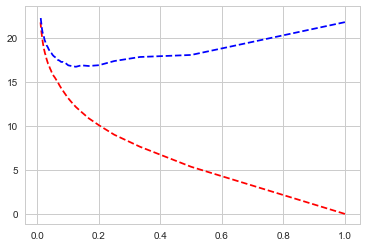

16.73041841311825


In [101]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(d_x, d_y, test_size=0.3)
lst = []
for i in range(1,101):
    lst.append(1/i)
from sklearn.neighbors import KNeighborsRegressor
score=[]
mse_kn1 = []
mse_kn2 = []
for k in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train2, y_train2) 
    score.append(neigh.score(X_train2, y_train2))
    y_pred = neigh.predict(X_test2)
    mse_kn2.append((mean_squared_error(y_test2,y_pred)))
    mse_kn1.append((mean_squared_error(y_train2,neigh.predict(X_train2))))
print('opt_k = ',mse_kn2.index(min(mse_kn2)))
plt.plot(lst, mse_kn1, color='red', linestyle='dashed',label='train')
plt.plot(lst, mse_kn2, color='blue', linestyle='dashed',label='test')
plt.show()
print(min(mse_kn2))

opt_k =  5


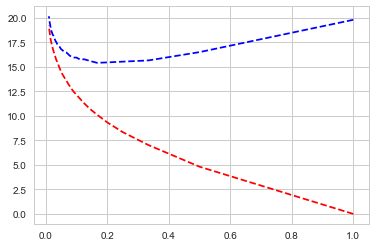

15.405244296412404


In [108]:
from sklearn import preprocessing
X_train2 = preprocessing.scale(X_train2)
X_test2 = preprocessing.scale(X_test2)
lst = []
for i in range(1,101):
    lst.append(1/i)
from sklearn.neighbors import KNeighborsRegressor
score=[]
mse_kn1 = []
mse_kn2 = []
for k in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train2, y_train2) 
    score.append(neigh.score(X_train2, y_train2))
    y_pred = neigh.predict(X_test2)
    mse_kn2.append((mean_squared_error(y_test2,y_pred)))
    mse_kn1.append((mean_squared_error(y_train2,neigh.predict(X_train2))))
print('opt_k = ',mse_kn2.index(min(mse_kn2)))
plt.plot(lst, mse_kn1, color='red', linestyle='dashed',label='train')
plt.plot(lst, mse_kn2, color='blue', linestyle='dashed',label='test')
plt.show()
print(min(mse_kn2))

# (j) Compare the results of KNN Regression with linear regression and provide your analysis.

In [82]:
a = np.ones( (100))*mse2_ 
a

array([4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,
       4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,
       4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,
       4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,
       4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,
       4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,
       4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,
       4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,
       4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,
       4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,
       4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317, 4.41616317,

4.4161631681497155

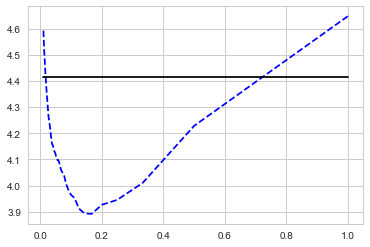

In [85]:
plt.plot(lst, mse_kn2, color='blue', linestyle='dashed',label='knn')
plt.plot(lst, a, color='black', linestyle='solid',label='linear regression')

Answer: Based on mse plot above, we can find that knn Regression is better in this case. Here are some possible points that this situation happend. First is that, from (f), we can know that there is nonlinear association, so the non-param more flexible method knn Regression may have better chance to fit. Second is that the number of coefficients is not that much (p=4), which is kind of friendly for knn Regression, because knn always have bad performance with high dimensions.